In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from itertools import count

## Input adjacency matrix

In [2]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

In [3]:
H = nx.from_numpy_matrix(A)

## Question 1 : Centrality

#### Implement degree, closeness, betweenness and eigenvector centrality in python. Your functions should take as input an adjacency matrix and return a list or vector of centrality values. You may focus on just undirected graphs. Do not simply invoke NetworkX functions.

## 1. Degree Centrality

In [4]:
def D_centrality(A):
    Cd = np.sum(A, axis=1)
    Cd = Cd /(len(A) - 1)
    return list(Cd)

## Test :

In [5]:
D_centrality(A)

[0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

In [6]:
list(nx.degree_centrality (H).values())

[0.375, 0.25, 0.375, 0.5, 0.5, 0.5, 0.5, 0.375, 0.125]

## 2. Closeness Centrality

In [7]:
def C_centrality(A):
    number_of_nodes = len(A)
    shortest_path = np.zeros((number_of_nodes , number_of_nodes))

    # largest path will be total number of nodes if all nodes are in straint line

    A_powers = [np.linalg.matrix_power(A,m) for m in range(1, number_of_nodes + 1)]
    min_lengths = np.zeros((number_of_nodes,number_of_nodes))
    for i in range(number_of_nodes):
        for j in range(number_of_nodes):
            for x in range(number_of_nodes):
                X = A_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    shortest_path[i,j] = x + 1
                    break

    Cc = np.sum(shortest_path, axis=1)
    Cc = (number_of_nodes - 1) / Cc
    return list(Cc)

## Test

In [8]:
C_centrality(A)

[0.47058823529411764,
 0.34782608695652173,
 0.47058823529411764,
 0.61538461538461542,
 0.61538461538461542,
 0.61538461538461542,
 0.5,
 0.47058823529411764,
 0.34782608695652173]

In [9]:
list(nx.closeness_centrality (H).values())

[0.47058823529411764,
 0.34782608695652173,
 0.47058823529411764,
 0.6153846153846154,
 0.6153846153846154,
 0.6153846153846154,
 0.5,
 0.47058823529411764,
 0.34782608695652173]

## 3. Betweenness Centrality

In [10]:
def sigma_through_jay(A, j, min_lengths, sigma):
    node_count = len(A)
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(node_count)
    B[:,j] = np.zeros(node_count)
    B_powers = [np.linalg.matrix_power(B,m) for m in range(1, node_count + 1)]
    B_sigma = np.zeros((node_count, node_count))
    B_min_lengths = np.zeros((node_count, node_count))
    for i in range(node_count):
        for k in range(node_count):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)   

In [11]:
def betweenness(A, j, min_lengths, sigma):
    # Finally, the betweenness
    node_count = len(A)
    sigst = sigma_through_jay(A,j, min_lengths, sigma)
    total = 0
    for i in range(node_count):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [12]:
def B_centrality(A):
    node_count = len(A)
    A_powers = [np.linalg.matrix_power(A,m) for m in range(1, node_count + 1)]
    sigma = np.zeros((node_count, node_count)) #np.zeros((number_of_nodes , number_of_nodes))
    min_lengths = np.zeros((node_count,node_count))
    for i in range(node_count):
        for j in range(node_count):
            for x in range(node_count):
                X = A_powers[x].copy()
                if X[i,j] > 0 and i != j:
                    sigma[i,j] = X[i,j]
                    min_lengths[i,j] = x + 1
                    break
    btwn_values = [betweenness(A, x, min_lengths, sigma) for x in range(9)]
    return btwn_values

## Test

In [13]:
B_centrality(A)

[3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

In [14]:
list(nx.betweenness_centrality(H, normalized=False).values())

[3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

## 4. Eigenvector Centrality

In [15]:
def E_centrality(M):
    w,v= np.linalg.eig(M)
    Ec = []
    for i in v:
        Ec.append(i[np.argmax(w)])
    return Ec

## Test

In [16]:
E_centrality(A)

[0.19574879570918419,
 0.1116837032398663,
 0.19574879570918396,
 0.37874802533567853,
 0.46808547631042252,
 0.46808547631042252,
 0.40997938953295338,
 0.3840203838411051,
 0.11695606174529273]

In [17]:
list(nx.eigenvector_centrality(H).values())

[0.1957540414970864,
 0.1116880543296416,
 0.19575404149708636,
 0.378751077373384,
 0.4680839101306905,
 0.4680839101306905,
 0.4099765880693859,
 0.3840179229632457,
 0.11695489991950335]

## Question 2 : Plot Graph
#### Create a function that takes as input an adjacency matrix and plots in the notebook a depiction of the associated graph with eigenvector centrality represented by node size. Nodes should be represented as circles. In other words, learn how to produce diagrams like this one:

<img src="https://upload.wikimedia.org/wikipedia/en/8/8b/PageRanks-Example.jpg" style="width: 300px;"/>

In [18]:
def generate_graph(A):

    G = nx.from_numpy_matrix(A)
    ev = list(nx.eigenvector_centrality(G).values())

    # calculate node labels
    node_labels = ["%d\n%.3f" % (i, ev[i]) for i in range(len(A))]
    nodes = [i for i in range(len(A))]

    # calculate node sizes
    groups = set(ev)
    mapping = dict(zip(sorted(groups),count()))
    node_sizes = [(mapping[ev[n]] + 1) * 200 for n in nodes]

    # calculate color values
    groups = set(ev)
    mapping = dict(zip(sorted(groups),count()))
    colors = [mapping[ev[n]] for n in nodes]

    # draw graph
    pos=nx.circular_layout(G)
    pos = nx.spring_layout(G, scale=2, k = 1.5, pos = pos, iterations=20)
    nx.draw(G, pos)
    nx.draw_networkx_labels(G, pos, labels = dict(zip(nodes, node_labels)))
    nc = nx.draw_networkx_nodes(G, pos, node_size = node_sizes, node_color=colors, cmap=plt.cm.jet)

    plt.show()

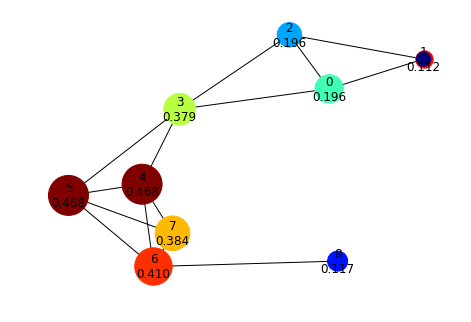

In [19]:
generate_graph(A)